### Renan Peneluppi - renanpeneluppi@gmail.com - 416 830 7444

###  Shopify Winter 2021 Data Science Intern Challenge 

#### Problem Statement

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

- Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

- What metric would you report for this dataset?

- What is its value?


### Important from problem statement :

#### Each of the 100 shops only sells one model.  

In [1332]:
# import packahges I usually use for this kind of analysis and data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Answer for the questions on part one of the challenge can be found below, and the analytical process and data exploration to justify the answer are listed on the commented code right after it. 

#### For this exploration I used python, pandas data frames, NumPy, Matplotlib and seaborn for plotting. Plotting wasn't absolutely necessary but looking at plots always gives me some more insightful ideas.


#### - Think about what could be going wrong with our calculation. Think about a better way to evaluate this data.

The main issue with the first assumption for AOV was that it was done with plain mean calculation, without first cleaning the data and looking for information with values that are too high, too low, or just out of context. 

After exploring the data I found that user_id 607 has transactions on shop_id 42 for the amount 70400 and the transaction timestamp always at 4:00:00 time. This led me into assuming these are some sort of rebate or adjustment, so I chose to exclude these high amounts of transactions from the data set. Another curious finding was shop_id 78 had pretty expensive shoes (given each shop only sells one model), the amount for these shows are so high that one could even assume this was done by some sort of adjustment. I'm assuming it's in a category of its own, an outlier, so I chose to also exclude these transactions. 

After this cleaning, the AOV comes to 302.58, with a maximum order amount of 1760 and a minimum amount of 90. That makes more sense compared to the original 3145.13. But that doesn’t really tell much about the data.
Anyway, there is more to this data, so I did some feature engineering to get the days the transactions are made (given they are all for the same month), We can also explore the time and weekday of these transactions.



#### - What metric would you report for this dataset?

I first looked at the payment type proportion, looking for any methods that might stand-out, but that is pretty balanced overall.

I then explored the time stamp to find patterns in time, day of the week and period of the month with the best performance. This was pretty interesting, and even could be further explored. Focusing on the days of the week and hour performance I could already get some interesting insights, with some more time I could further explore it to breakdown my findings for each shop, price bin group even customers.

As you can check on the bottom end of this file the time of the transactions have great value in this data set. After some feature engineering, I was able to check, for example, what time of the day and day of the week has the best average order amounts, and found out that Thursdays are the best day for sales, but also that lunchtime is a slow time of the day. In addition, the first and last weeks of the month had the best performance on order amounts.


#### - What is its value?

This is a valuable file to help understand customer behaviour and plan for promotions, customer support, even server requirements. 

The outliers and data that were dropped from this table could also be used to find suspicious transactions or understand operational procedures that can be improved, for example, all adjustments seem to be done using the same account but don't match the values for the shop's sales.

In [1333]:
#import provided dataset as a dataframe with pandas
df = pd.read_csv('data\Shopify_data_challenge.csv')

In [1334]:
# take a look at the top of the dataframe to get familiar with it
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [1335]:
#Order Id can be used as the index, so I will set it to be so. 
#This could also be set to multi-index using order shop and user ids, for now I don't see the need for it.

df.set_index('order_id')
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


### Now I can start exploring the data set

In [1336]:
# check for null values
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [1337]:
# check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [1338]:
#Take a quick look at max, min, mean amounts
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [1339]:
#How many unique customer id?
print('Unique Customers: '+ str(df['user_id'].nunique()))

#How many unique shop id?
print('Unique shop_ID: '+ str(df['shop_id'].nunique()))

Unique Customers: 301
Unique shop_ID: 100


### Null values are not a problem so I can carry on to check other things

First I already have an idea about the issue for having an AOV of $3145.13. 
I will first try to replicate it to check if I'm right.



In [1340]:
df['order_amount'].mean()

3145.128

As I suspected the calculation is done over a simple mean of the order value, order values however take into account multiple items as seem on column 'total_items'. We can plot the number of items per order to check this distribution 

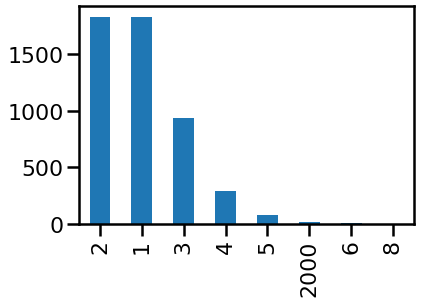

In [1341]:
df['total_items'].value_counts().plot(kind='bar')

In [1342]:
print(df['total_items'].value_counts())

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64


In [1343]:
# As suspected there are outliers with numbers that are not really expected pulling the mean up for total order amount and number of items
df.sort_values(by=['order_amount'], ascending=False)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


As shown above there are 17 orders with 2000 items. That is likely what is pulling the AOV up to $3145.13
I want to explore and deal with this. Should not be a big issue, these are only 17 orders out of 5000.


In [1344]:
# Firsty let me look at these orders
df[df['total_items']==2000].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00


In [1345]:
df[df['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


In [1483]:
#Check if the amounts for shop ID 42 macth the value of 35.2 for other users
df[df['shop_id']==42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price,day,time,hour,minute,weekday
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0,24,14:15:41,14,15,Friday
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0,11,18:14:39,18,14,Saturday
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0,4,14:32:58,14,32,Saturday
834,835,42,792,352,1,cash,2017-03-25 21:31:25,352.0,25,21:31:25,21,31,Saturday
835,836,42,819,704,2,cash,2017-03-09 14:15:15,352.0,9,14:15:15,14,15,Thursday
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45,352.0,13,23:43:45,23,43,Monday
979,980,42,744,352,1,debit,2017-03-12 13:09:04,352.0,12,13:09:04,13,9,Sunday
1364,1365,42,797,1760,5,cash,2017-03-10 06:28:21,352.0,10,06:28:21,6,28,Friday
1367,1368,42,926,1408,4,cash,2017-03-13 02:38:34,352.0,13,02:38:34,2,38,Monday
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,352.0,12,23:00:22,23,0,Sunday


Considering that 70400 divided by 2000 is 35.2 these are likely some sort of adjustment transactions, as this value is too low for the expected shoe price.

Another point that leads me into believing this is some sort of adjustment is that these transactions all take place at 4:00:00 according to the timestamp.

In addition, all transactions with this amount are done by user_id 607.
And all other values for other users are 352. So 35.2 could be a 10% discount adjustment or even a price increase.

I cannot confirm that with the given that, it would take further exploration and asking some questions to people in charge of operations to understand this, for now, I'm assuming I can eliminate these rows. 


I can still check with the quantities of 35.2 transactions matches the sales of 352 transactions

In [1347]:
shop42 = df[df['shop_id']==42]
shop42.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58


In [1348]:
print('Total items for shop42 where total_items row is 2000: ' +str(shop42['total_items'][shop42['total_items']==2000].sum()))

Total items for shop42 where total_items row is 2000: 34000


In [1349]:
# Total Items for shop 42 where totalitems row is not 2000
shop42['total_items'][shop42['total_items']!=2000].sum()

63

Since the number of items with amount 35.2 is not the same as the number of other items I can't assume this is a discount

#### For the purpose of analysing AOV I rather drop user 607 and it's adjustments for now. 

In [1350]:
# dropping user 607 lines
# Get indexes where user_id column has value 607
indexNames = df[df['user_id'] == 607].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

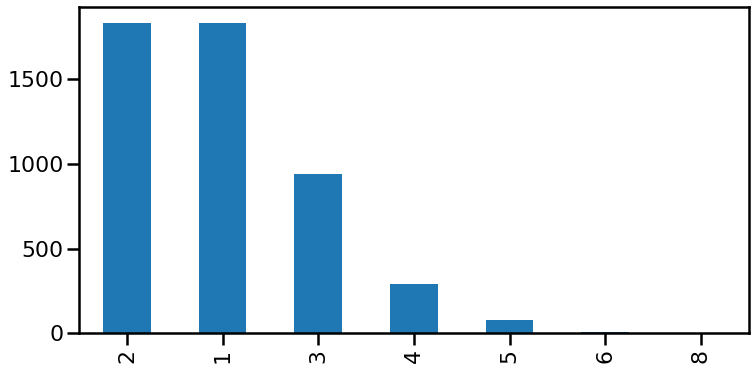

In [1351]:
# now we don't have to worry about this user and numbers should make more sense.
# I'll plot how many times each quantity appears on the data set

df['total_items'].value_counts().plot(kind='bar', figsize=(12,6))

In [1352]:
#Just double check that rows have bene dropped. 
df[df['user_id']==607]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at


Let's check what the AOV looks like now

In [1353]:
print('AOV after removal of user 607: $' + str(round(df['order_amount'].mean(),2)))

AOV after removal of user 607: $754.09


This looks better and makes more sense, but it can still be considered a high value for shoes. 
We can still verify the value per item, this will be the actual value of the product each shop works with, as It's given that each shop only works with one model, and from there check for outliers. 


In [1354]:
#Include a column with amount per item per order
df['item_price']=df['order_amount']/df['total_items']
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [1355]:
# now we can check the average price per item, also the max and minimun
df['item_price'].agg([np.mean, np.max, np.min])

mean      387.86474
amax    25725.00000
amin       90.00000
Name: item_price, dtype: float64

Here is something else to explore the maximum item price of 25725 seems quite high for shoes

In [1356]:
#Check all item prices above 500, I chose 500 as it sounds high, no particular reason for that, just a hunch.
df[df['item_price']>500].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0


### Seems that the same shop (shop_id 78) works with the high amounts, I can double check that

In [1357]:
#define dataframe with high amounts
over500=df[df['item_price']>500]
# check uniqu shop_id in high amount data frame
over500['shop_id'].unique()

array([78], dtype=int64)

In [1358]:
# Before moving on I should make sure that shop_id 78 does not have other values in the original data frame
df['item_price'][df['shop_id']==78].agg([np.mean,np.max,np.min])

mean    25725.0
amax    25725.0
amin    25725.0
Name: item_price, dtype: float64

It's interesting how the price per item for all rows for shop_id 78 have the same amount of 25725. I still don't know the reason, that is a story on its own.

These are very expensive shoes, I wonder how many of these they sell


In [1359]:
#sum of items from shop ID 78
df['total_items'][df['shop_id']==78].sum()

88

I think shop 78 is in a category of it's own, so I'll set a separete dataframe for them. 


In [1360]:
df_shop78 = df[df['shop_id']==78]
df_shop78.head(3)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0


In [1361]:
# dropping shop_id 46 lines
# Get indexes where user_id column has value 607
indexNames = df[df['shop_id'] == 78].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)

In [1362]:
df.shape

(4937, 8)

In [1363]:
# now we can check the average price per item, also the max and minimun
df['item_price'].agg([np.mean, np.max, np.min])

mean    151.788536
amax    352.000000
amin     90.000000
Name: item_price, dtype: float64

#### Now a average price per item of 151.79 makes more sense

In [1364]:
# now we can check the average sales amount, also the max and minimun
df['order_amount'].agg([np.mean, np.max, np.min])

mean     302.580514
amax    1760.000000
amin      90.000000
Name: order_amount, dtype: float64

In [1365]:
# We can also check the average number of items
df['total_items'].agg([np.mean, np.max, np.min])

mean    1.994734
amax    8.000000
amin    1.000000
Name: total_items, dtype: float64

### After elimating the outliers with amounts that are too high with low frequency that assume were causing the average price to be driven up we now have the average price per item at 151, that makes more sense. 

### The average order amount is at 302, also making more sense for multiple items and given the average quantity of items per order is 2, with some orders with up to 8 items.

From this data we can also find how much each shop mekes by payment type and the total

In [1366]:
#Define a dataframe for sum of amount per payment types per shop_id
payment_method = df.pivot_table('order_amount', index = 'shop_id', columns ='payment_method',aggfunc=np.sum)
payment_method['total'] = payment_method['cash']+payment_method['credit_card']+payment_method['debit']
payment_method.head()

payment_method,cash,credit_card,debit,total
shop_id,,,,
1,4108,3792,5688,13588
2,2444,3384,3760,9588
3,4440,4884,5328,14652
4,3968,3200,6016,13184
5,6106,3834,3124,13064


In [1367]:
# 
df.groupby('shop_id').sum()['total_items']

shop_id
1       86
2      102
3       99
4      103
5       92
6      121
7      109
8       84
9      117
10     119
11      95
12      93
13     136
14     121
15     105
16      71
17     100
18     112
19     126
20     103
21     100
22      90
23     112
24     126
25      86
26      95
27     107
28      84
29     118
30     108
31      98
32      79
33      87
34      96
35     104
36      98
37     115
38      72
39      82
40      88
41     127
42      63
43     107
44      71
45     110
46      90
47      84
48      83
49     115
50      92
51      89
52      89
53     130
54     104
55      92
56      69
57     107
58     109
59     121
60      93
61     109
62      83
63     113
64      88
65     116
66     103
67      77
68      88
69     121
70     117
71     130
72      89
73     118
74      76
75      79
76      87
77      90
79      98
80      93
81     128
82      83
83      81
84     132
85      67
86     111
87     102
88     101
89     118
90     111
91     110
92

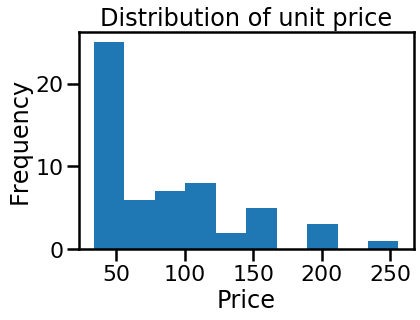

In [1368]:
# I can plot the most frequent unit prices
plt.figure()
plt.hist(df['item_price'].value_counts())
plt.title('Distribution of unit price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [1369]:
df.sort_values(by=['order_amount'])

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price
4183,4184,92,844,90,1,debit,2017-03-26 4:22:39,90.0
228,229,92,757,90,1,debit,2017-03-13 23:57:51,90.0
4923,4924,92,965,90,1,credit_card,2017-03-09 5:05:11,90.0
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08,90.0
4932,4933,92,823,90,1,credit_card,2017-03-24 2:17:13,90.0
...,...,...,...,...,...,...,...,...
4141,4142,54,733,1064,8,debit,2017-03-07 17:05:18,133.0
3538,3539,43,830,1086,6,debit,2017-03-17 19:56:29,181.0
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34,352.0
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22,352.0


In [1370]:
a=df[df['order_amount']<400]

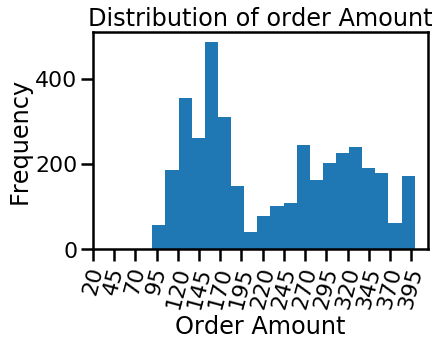

In [1371]:
# I can plot the most frequent unit prices
plt.figure()
plt.hist(a['order_amount'], bins=20)
plt.xticks(np.arange(20,400,25),ROTATION = 75 )
plt.title('Distribution of order Amount')
plt.xlabel('Order Amount')
plt.ylabel('Frequency')
plt.show()

#### As seem above the distribution of order amount values shows two distinct markets, one concentrade at around 150 value and another above 220 to 330. 

In [1372]:
# Check proportion of payments by payment type.
df.groupby(['payment_method']).sum()[['order_amount']]/df['order_amount'].sum()*100

,order_amount
payment_method,
cash,31.436298
credit_card,34.462660
debit,34.101042


#### I'd also like to further explore the time stamp on the data set

In [1374]:
#import datetime for datetime functions
from datetime import datetime as dt

In [1375]:
#convert time stamp to datetime format
df['created_at']= pd.to_datetime(df['created_at']) 

In [1376]:
#create new column just with the date
df['day'] = df['created_at'].dt.day

In [1377]:
#create new column just with the time
df['time'] = df['created_at'].dt.time

In [1378]:
#create new column just with the hour
df['hour'] = df['created_at'].dt.hour

In [1379]:
#create new column just with the minutes
df['minute'] = df['created_at'].dt.minute

In [1380]:
#create new column just with the weekday
df['weekday'] = df['created_at'].dt.day_name()

In [1381]:
#check my new features in the dataframe
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,item_price,day,time,hour,minute,weekday
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,13,12:36:56,12,36,Monday
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,3,17:38:52,17,38,Friday
2,3,44,861,144,1,cash,2017-03-14 04:23:56,144.0,14,04:23:56,4,23,Tuesday
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,26,12:43:37,12,43,Sunday
4,5,18,883,156,1,credit_card,2017-03-01 04:35:11,156.0,1,04:35:11,4,35,Wednesday


In [1382]:
# Check best selling day of the week
df.groupby('weekday').sum()['order_amount'].sort_values()

weekday
Monday       192687
Sunday       196206
Friday       203426
Saturday     204595
Tuesday      206143
Wednesday    236702
Thursday     254081
Name: order_amount, dtype: int64

In [ ]:
#adjust how big of a dataframe can be visualized by pandas
pd.set_option('display.max_rows', 200)

In [1383]:
#Set new dataframe to be used plotting the order amounts per day of the week and hour
hourDF=df.groupby(['weekday','hour']).sum()['order_amount'].unstack()

In [1384]:
#TRanspose dataframe for better vizualisation
hourDF = hourDF.transpose()

In [1385]:
# set a new column of the mean amount for each hour, so iterrow
col = hourDF.loc[: , "Friday":"Wednesday"]

hourDF['mean'] = col.mean(axis=1)
hourDF

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mean
hour,,,,,,,,
0,11969,5309,6570,11995,5457,5749,9989,8148.285714
1,8874,7911,9449,7937,11013,10928,9855,9423.857143
2,9037,8525,6881,9436,13770,7561,8745,9136.428571
3,6914,9725,10675,10211,12240,7602,12931,10042.571429
4,5839,7549,9829,7820,9929,6633,11857,8493.714286
5,5632,9306,7202,8135,8264,10725,11643,8701.000000
6,10022,6168,6163,7871,11797,11197,8732,8850.000000
7,8598,11981,12214,9708,8477,8995,11601,10224.857143
8,5212,6446,9010,8729,15965,11068,8918,9335.428571


In [1386]:
#adjust the value on last column to 2 decimals only
hourDF['mean'] = round(hourDF['mean'],2)

In [1387]:
#use the index as hours for plotting
hourDF['mockhour']=hourDF.index
hourDF

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,mean,mockhour
hour,,,,,,,,,
0,11969,5309,6570,11995,5457,5749,9989,8148.29,0
1,8874,7911,9449,7937,11013,10928,9855,9423.86,1
2,9037,8525,6881,9436,13770,7561,8745,9136.43,2
3,6914,9725,10675,10211,12240,7602,12931,10042.57,3
4,5839,7549,9829,7820,9929,6633,11857,8493.71,4
5,5632,9306,7202,8135,8264,10725,11643,8701.00,5
6,10022,6168,6163,7871,11797,11197,8732,8850.00,6
7,8598,11981,12214,9708,8477,8995,11601,10224.86,7
8,5212,6446,9010,8729,15965,11068,8918,9335.43,8


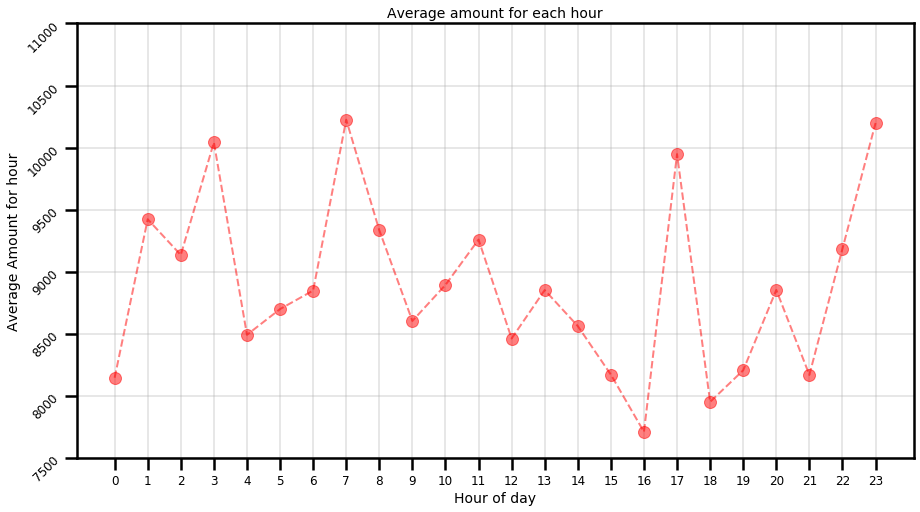

In [1447]:
#plot the avergare amount of orther according to hour of the day

plt.figure(figsize=(15,8))

plt.plot(hourDF['mockhour'], hourDF['mean'],color='red', alpha=0.5,marker='o',linewidth=2,linestyle='dashed')
plt.title('Average amount for each hour',fontsize=14)
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Average Amount for hour',fontsize=14)
plt.yticks((np.arange(7500,11500,500)),fontsize=12,rotation=45)
plt.xticks((list(range(0,24,1))),fontsize=12)
plt.grid(True,alpha=0.3)
plt.show()

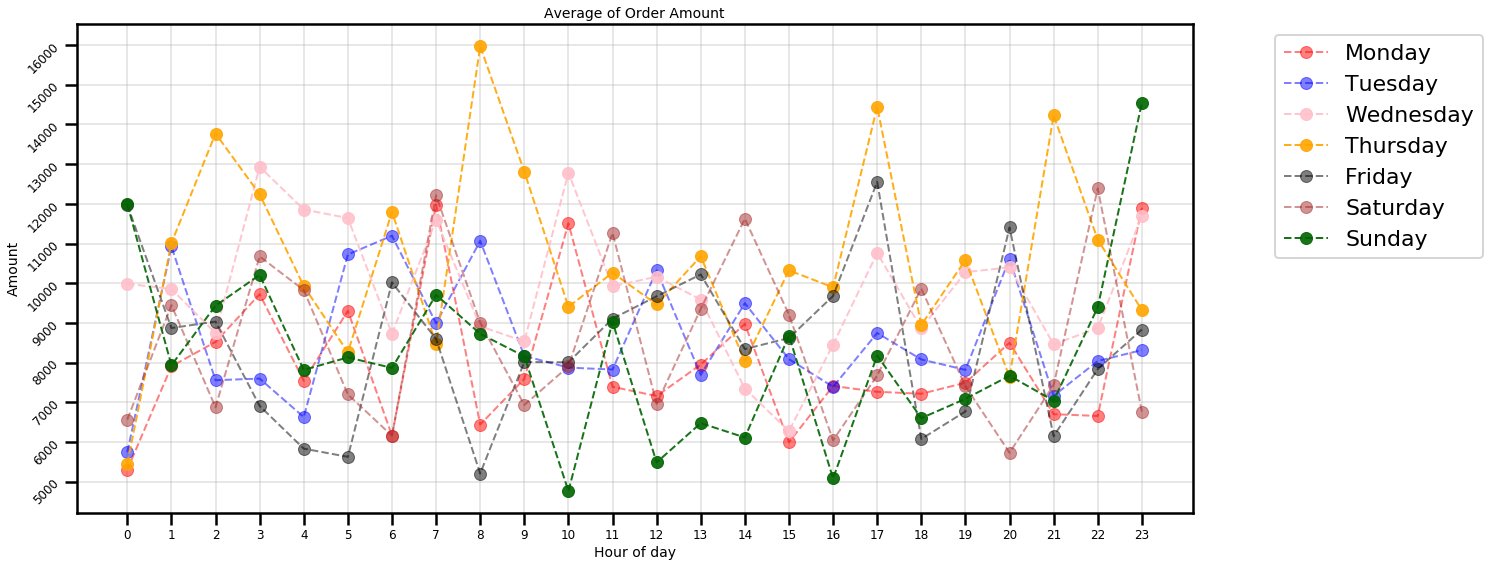

In [1485]:
# Now I can plot all days of the week toghether to verify if anything stands out. 

#set figure
plt.figure(figsize=(20,9))

#plot what I need
plt.plot(hourDF['mockhour'], hourDF['Monday'],color='red', alpha=0.5,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Tuesday'],color='blue', alpha=0.5,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Wednesday'],color='pink', alpha=0.9,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Thursday'],color='orange', alpha=0.9,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Friday'],color='black', alpha=0.5,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Saturday'],color='brown', alpha=0.5,marker='o',linewidth=2,linestyle='dashed')
plt.plot(hourDF['mockhour'], hourDF['Sunday'],color='darkgreen',alpha= 0.9,marker='o',linewidth=2,linestyle='dashed')
plt.title('Average of Order Amount',fontsize=14)
plt.xlabel('Hour of day',fontsize=14)
plt.ylabel('Amount',fontsize=14)
plt.yticks((np.arange(5000,16900,1000)),fontsize=12,rotation=45)
plt.xticks((list(range(0,24,1))),fontsize=12)
#set legends and legend locationout of plot area
plt.legend(["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"], loc ="right",bbox_to_anchor=(1.0, 1.0, 0.27, -0.5)) 
plt.grid(True,alpha=0.3)
plt.show()


### Considering the average amount of order for each time of the day we can see that :

 - at 3a.m, 7am, 5pm and 11pm are peak times throughout the entire week
 - Thursday is the best performing day
 
#### Seems that lunch time is not a good time to buy shoes.

## Could also use Bokeh to build interactive plot for each day of the week, with highlights amd other Bokeh tools, but that would take a bit longer to set up, I will explore it if I have time 

I could also explore what happens on thurdays to have the higher order amounts. 

In [1543]:
#Get count of total transactions per day of the week
df.groupby(by=['weekday']).count()['order_id'].nlargest(7)

weekday
Thursday     830
Wednesday    813
Tuesday      690
Friday       674
Saturday     664
Sunday       635
Monday       631
Name: order_id, dtype: int64

In [1544]:
#Get sum of total transactions per day of the week
df.groupby(by=['weekday']).sum()['order_amount'].nlargest(7)

weekday
Thursday     2131865
Wednesday    2061674
Friday       1724854
Tuesday      1682312
Saturday     1631404
Sunday       1579794
Monday       1528382
Name: order_id, dtype: int64

In [1548]:
#Get sum of total transactions per day of the month
df.groupby(by=['day']).sum()['order_amount'].nlargest(10)

day
9     62662
7     57850
17    57359
1     54704
18    54064
26    53184
28    53019
27    51844
11    51580
2     51484
Name: order_amount, dtype: int64